## Train 데이터 Load

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
train_data = pd.read_csv('./dacon_236193/train.csv')
print('data 행렬 : ', train_data.shape)
train_data.head()

data 행렬 :  (39609, 23)


,ID,사고일시,요일,기상상태,시군구,도로형태,노면상태,사고유형,사고유형 - 세부분류,법규위반,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,사망자수,중상자수,경상자수,부상자수,ECLO
0,ACCIDENT_00000,2019-01-01 00,화요일,맑음,대구광역시 중구 대신동,단일로 - 기타,건조,차대사람,길가장자리구역통행중,안전운전불이행,...,상해없음,보행자,여,70세,중상,0,1,0,0,5
1,ACCIDENT_00001,2019-01-01 00,화요일,흐림,대구광역시 달서구 감삼동,단일로 - 기타,건조,차대사람,보도통행중,기타,...,상해없음,보행자,남,61세,경상,0,0,1,0,3
2,ACCIDENT_00002,2019-01-01 01,화요일,맑음,대구광역시 수성구 두산동,단일로 - 기타,건조,차대사람,차도통행중,안전운전불이행,...,상해없음,보행자,남,38세,경상,0,0,1,0,3
3,ACCIDENT_00003,2019-01-01 02,화요일,맑음,대구광역시 북구 복현동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,36세,중상,0,1,0,0,5
4,ACCIDENT_00004,2019-01-01 04,화요일,맑음,대구광역시 동구 신암동,단일로 - 기타,건조,차대차,추돌,안전운전불이행,...,상해없음,승용,남,52세,경상,0,0,1,0,3


## 요일별

### 사고 횟수

In [29]:
print(train_data['요일'].value_counts())

요일
금요일    6179
화요일    6023
수요일    5969
월요일    5895
목요일    5759
토요일    5670
일요일    4114
Name: count, dtype: int64


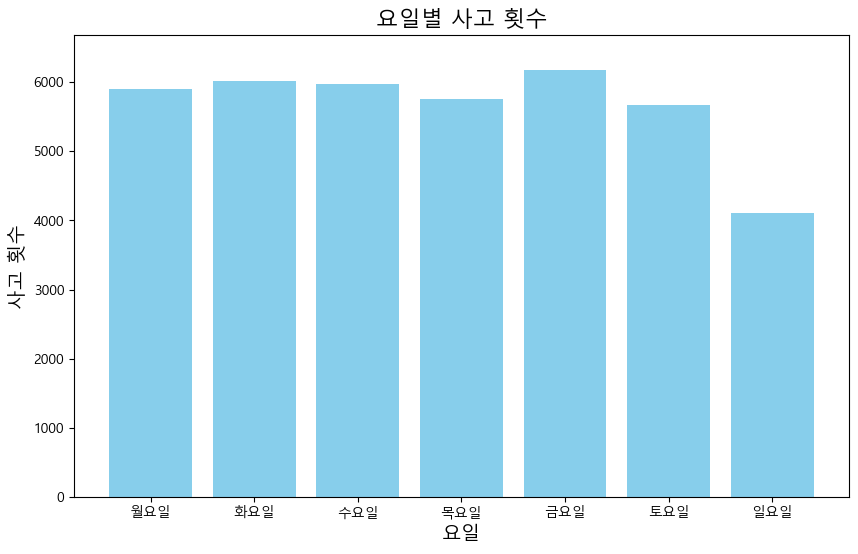

In [26]:
# 요일 별 사고 횟수 데이터 (월요일부터 일요일까지 순서대로 정렬된 데이터)
day_counts = train_data['요일'].value_counts().reindex(['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'])

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(day_counts.index, day_counts.values, color='skyblue')

# 그래프 제목 및 레이블 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.title('요일별 사고 횟수', fontsize=16)
plt.xlabel('요일', fontsize=14)
plt.ylabel('사고 횟수', fontsize=14)

# y축 눈금 설정
plt.ylim(0, max(day_counts.values) + 500)

# 그래프 보이기
plt.show()

### ECLO 평균

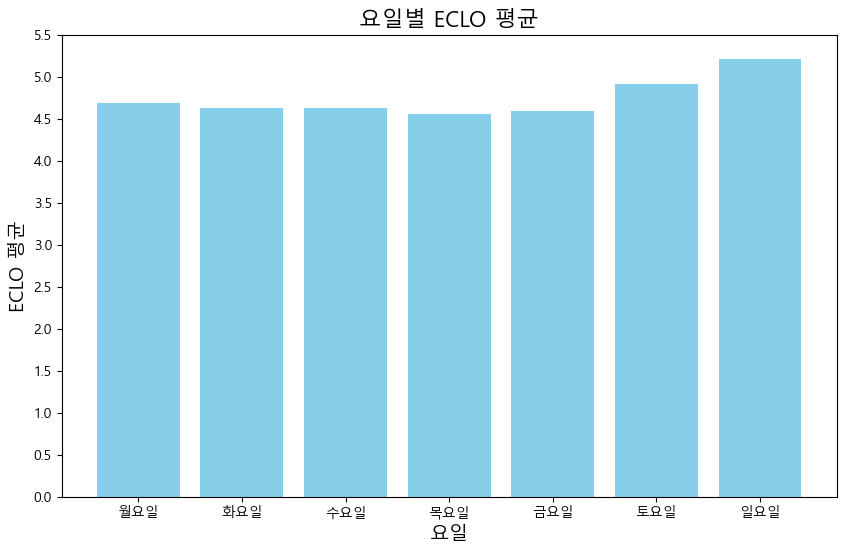

In [40]:
# 요일별 ECLO 컬럼의 평균 계산
mean_eclo_by_day = train_data.groupby('요일')['ECLO'].mean().reindex(['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일'])

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(mean_eclo_by_day.index, mean_eclo_by_day.values, color='skyblue')

# 그래프 제목 및 레이블 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.title('요일별 ECLO 평균', fontsize=16)
plt.xlabel('요일', fontsize=14)
plt.ylabel('ECLO 평균', fontsize=14)

y_ticks = np.arange(0, max(mean_eclo_by_day.values) + 0.5, 0.5)
plt.yticks(y_ticks)

plt.show()

## 기상 상태별

### 사고 횟수

In [27]:
print(train_data['기상상태'].value_counts())

기상상태
맑음    36181
비      2627
흐림      729
기타       56
안개        8
눈         8
Name: count, dtype: int64


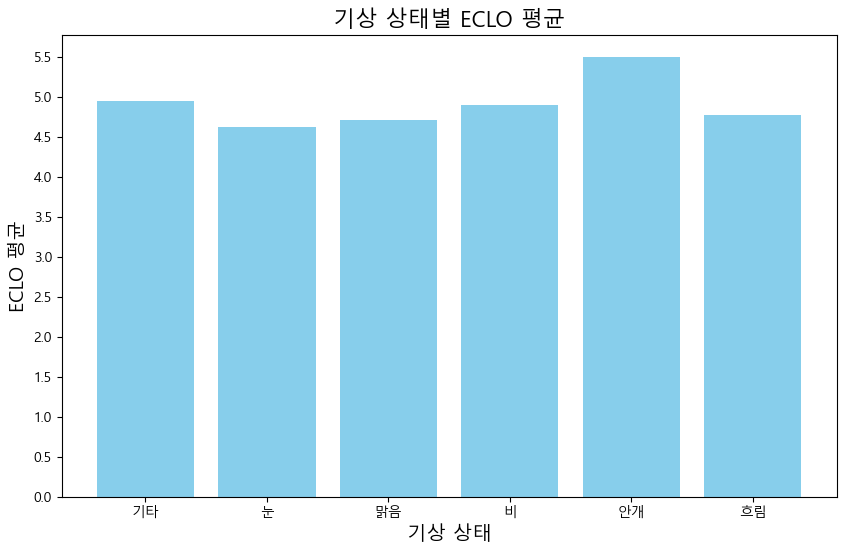

In [42]:
# 기상 상태별 ECLO 컬럼의 평균 계산
mean_eclo_by_weather = train_data.groupby('기상상태')['ECLO'].mean()

# 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(mean_eclo_by_weather.index, mean_eclo_by_weather.values, color='skyblue')

# 그래프 제목 및 레이블 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.title('기상 상태별 ECLO 평균', fontsize=16)
plt.xlabel('기상 상태', fontsize=14)
plt.ylabel('ECLO 평균', fontsize=14)

y_ticks = np.arange(0, max(mean_eclo_by_weather.values) + 0.5, 0.5)
plt.yticks(y_ticks)

plt.show()

## 시군구별

### 사고 횟수

In [43]:
print(train_data['시군구'].value_counts().head(20))

시군구
대구광역시 남구 대명동     1749
대구광역시 수성구 범어동    1173
대구광역시 달서구 상인동    1143
대구광역시 서구 비산동      968
대구광역시 서구 내당동      938
대구광역시 수성구 만촌동     908
대구광역시 서구 평리동      885
대구광역시 북구 산격동      879
대구광역시 동구 신암동      825
대구광역시 달서구 송현동     811
대구광역시 달성군 다사읍     792
대구광역시 동구 신천동      778
대구광역시 북구 태전동      705
대구광역시 달서구 용산동     691
대구광역시 달서구 감삼동     678
대구광역시 북구 침산동      668
대구광역시 달서구 신당동     635
대구광역시 달서구 이곡동     631
대구광역시 남구 봉덕동      625
대구광역시 달서구 두류동     624
Name: count, dtype: int64


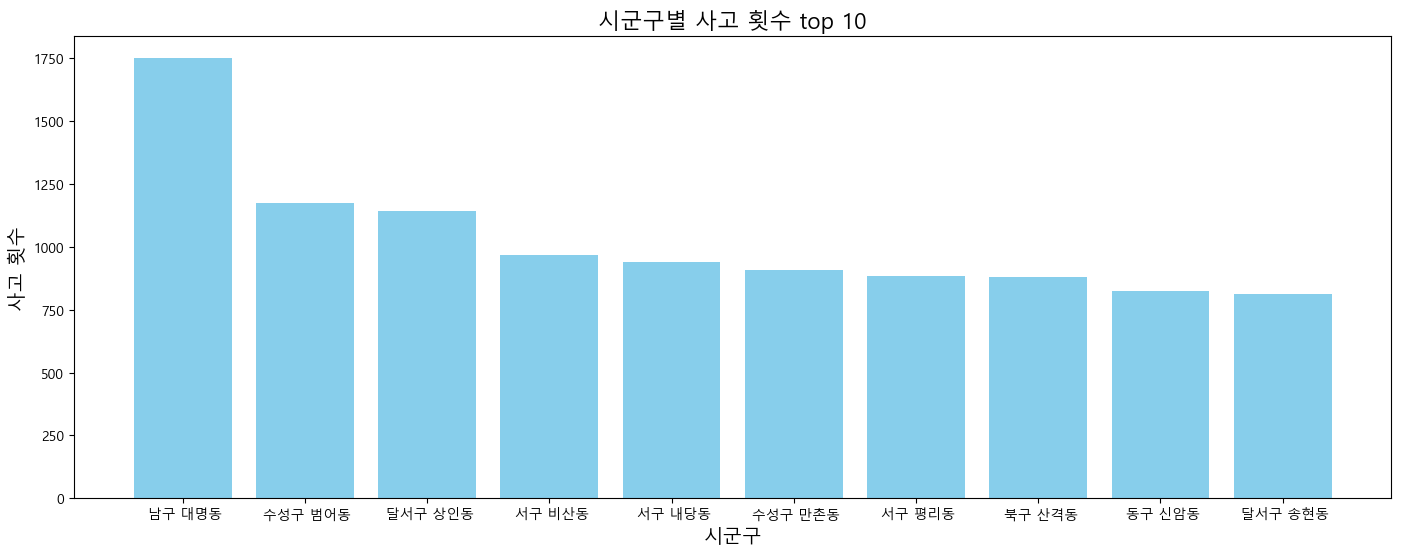

In [35]:
place = train_data['시군구'].value_counts().head(10)
place.index = place.index.str.replace('대구광역시', '')

# 막대 그래프 그리기
plt.figure(figsize=(17, 6))
plt.bar(place.index, place.values, color='skyblue')

# 그래프 제목 및 레이블 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.title('시군구별 사고 횟수 top 10', fontsize=16)
plt.xlabel('시군구', fontsize=14)
plt.ylabel('사고 횟수', fontsize=14)


# 그래프 보이기
plt.show()

## 도로 형태별

### 사고 횟수

In [36]:
print(train_data['도로형태'].value_counts())

도로형태
단일로 - 기타           19485
교차로 - 교차로안          9931
교차로 - 교차로부근         5746
기타 - 기타             1986
교차로 - 교차로횡단보도내      1474
단일로 - 지하차도(도로)내      309
주차장 - 주차장            236
단일로 - 교량             232
단일로 - 고가도로위          138
단일로 - 터널              64
미분류 - 미분류              8
Name: count, dtype: int64


### ECLO

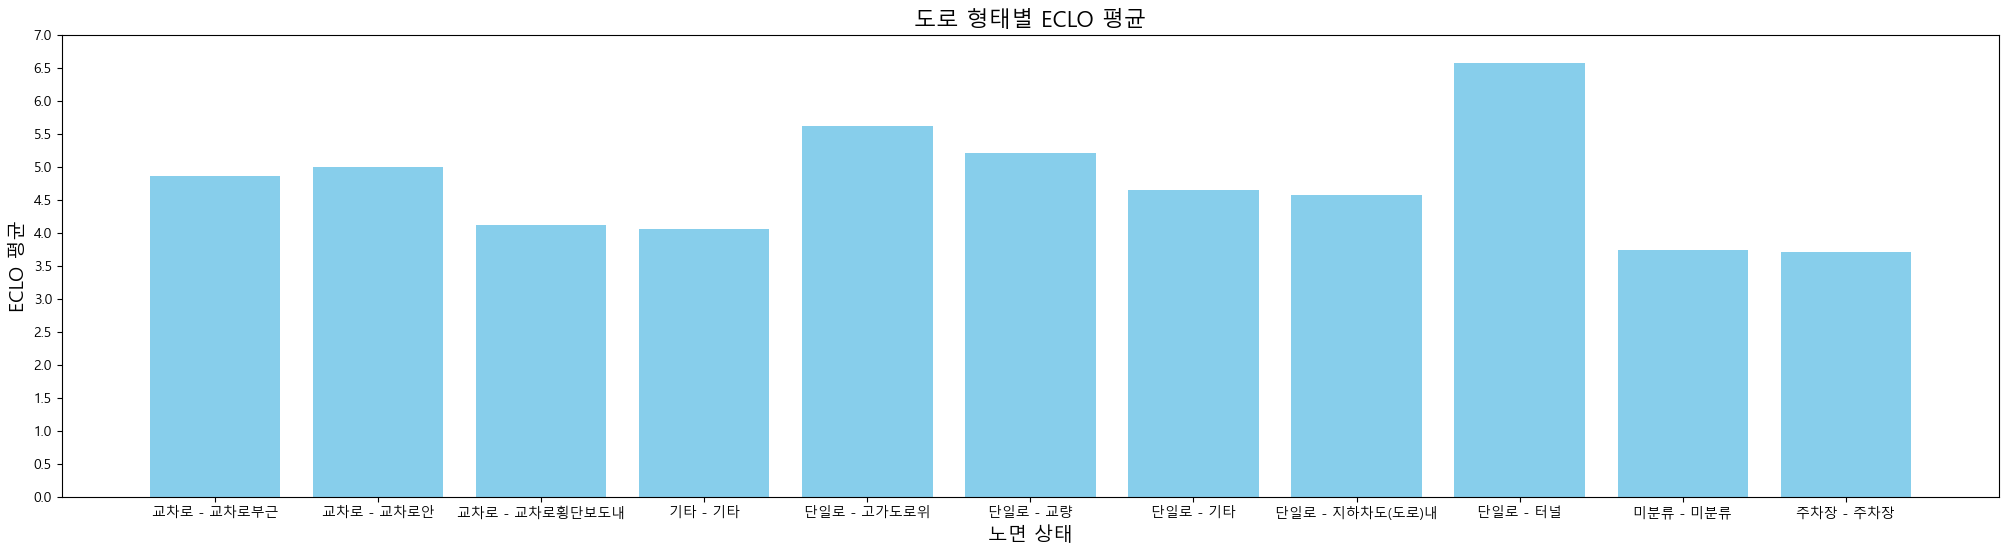

In [50]:
# 기상 상태별 ECLO 컬럼의 평균 계산
mean_eclo_by_type = train_data.groupby('도로형태')['ECLO'].mean()

# 막대 그래프 그리기
plt.figure(figsize=(25, 6))
plt.bar(mean_eclo_by_type.index, mean_eclo_by_type.values, color='skyblue')

# 그래프 제목 및 레이블 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.title('도로 형태별 ECLO 평균', fontsize=16)
plt.xlabel('노면 상태', fontsize=14)
plt.ylabel('ECLO 평균', fontsize=14)

y_ticks = np.arange(0, max(mean_eclo_by_type.values) + 0.5, 0.5)
plt.yticks(y_ticks)

plt.show()

## 노면 상태별

### 사고 횟수

In [48]:
print(train_data['노면상태'].value_counts())

노면상태
건조       36420
젖음/습기     3100
기타          58
서리/결빙       25
침수           3
적설           3
Name: count, dtype: int64


### ELOC

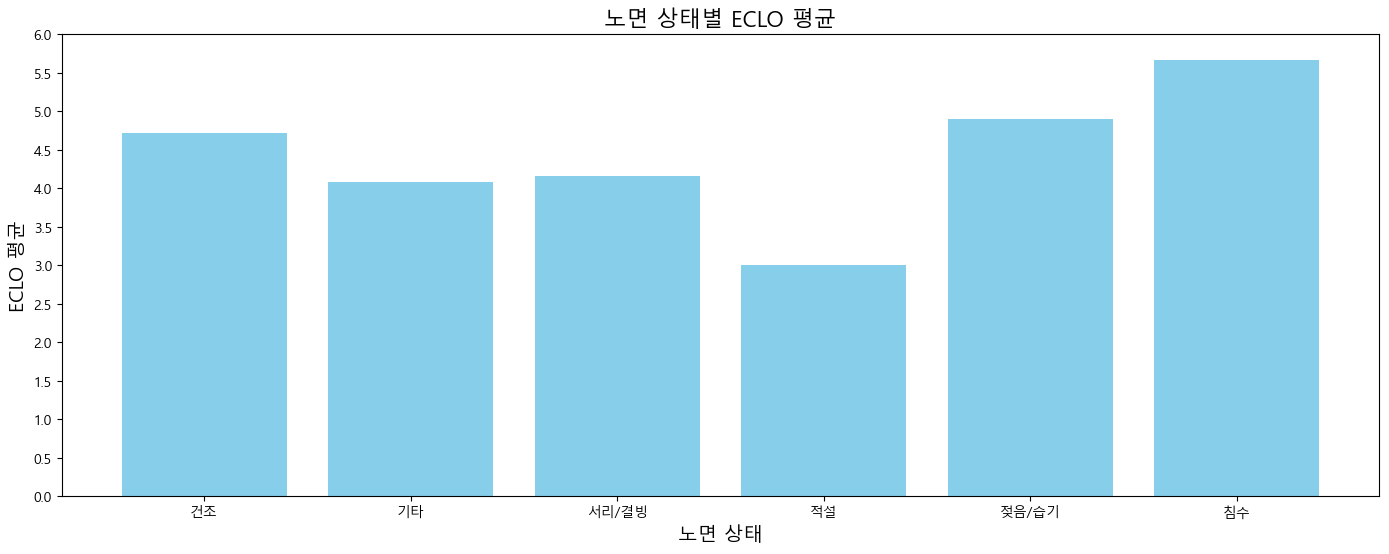

In [49]:
# 기상 상태별 ECLO 컬럼의 평균 계산
mean_eclo_by_road = train_data.groupby('노면상태')['ECLO'].mean()

# 막대 그래프 그리기
plt.figure(figsize=(17, 6))
plt.bar(mean_eclo_by_road.index, mean_eclo_by_road.values, color='skyblue')

# 그래프 제목 및 레이블 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.title('노면 상태별 ECLO 평균', fontsize=16)
plt.xlabel('노면 상태', fontsize=14)
plt.ylabel('ECLO 평균', fontsize=14)

y_ticks = np.arange(0, max(mean_eclo_by_road.values) + 0.5, 0.5)
plt.yticks(y_ticks)

plt.show()

## 어린이 보호구역 분포

In [52]:
school_data = pd.read_csv('./dacon_236193/external_open/school.csv' , encoding='cp949')
print('data 행렬 : ', school_data.shape)
school_data.head()

data 행렬 :  (640, 12)


,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자
0,초등학교,남도초등학교,대구광역시 남구 현충동길 74(대명동),대구광역시 남구 대명동 1709,35.845027,128.581402,대구광역시,남부경찰서,Y,7.0,6~8,2020-03-23
1,초등학교,영선초등학교,대구광역시 남구 영선길96(이천동),대구광역시 남구 이천동 477,35.852901,128.596014,대구광역시,남부경찰서,Y,8.0,6~10,2020-03-23
2,초등학교,성명초등학교,대구광역시 남구 성당로 30길 55(대명동),대구광역시 남구 대명동 3050,35.845152,128.570825,대구광역시,남부경찰서,Y,14.0,8~12,2020-03-23
3,초등학교,남덕초등학교,대구광역시 남구 앞산순환로 93길 33,대구광역시 남구 대명동 531-1,35.833042,128.573949,대구광역시,남부경찰서,Y,6.0,6~8,2020-03-23
4,초등학교,대명초등학교,대구광역시 남구 대명로 110,대구광역시 남구 대명동 960,35.838869,128.568889,대구광역시,남부경찰서,Y,5.0,6~10,2020-03-23


In [56]:
print(school_data['소재지지번주소'].value_counts().head(10))

소재지지번주소
대구광역시 달성군 옥포면 본리리 801      6
대구광역시 남구 대명동 2288          5
대구광역시 달성군 가창면 냉천리 815-1    4
대구광역시 달성군 다사읍 죽곡리 820      4
대구광역시 달성군 다사읍 세천리 1586     4
대구광역시 달성군 유가읍 봉리 623       4
대구광역시 달성군 다사읍 서재리 928      4
대구광역시 달성군 현풍면 중리 483       4
대구광역시 달성군 다사읍 매곡리 457      4
대구광역시 달성군 옥포면 반송리 151      4
Name: count, dtype: int64


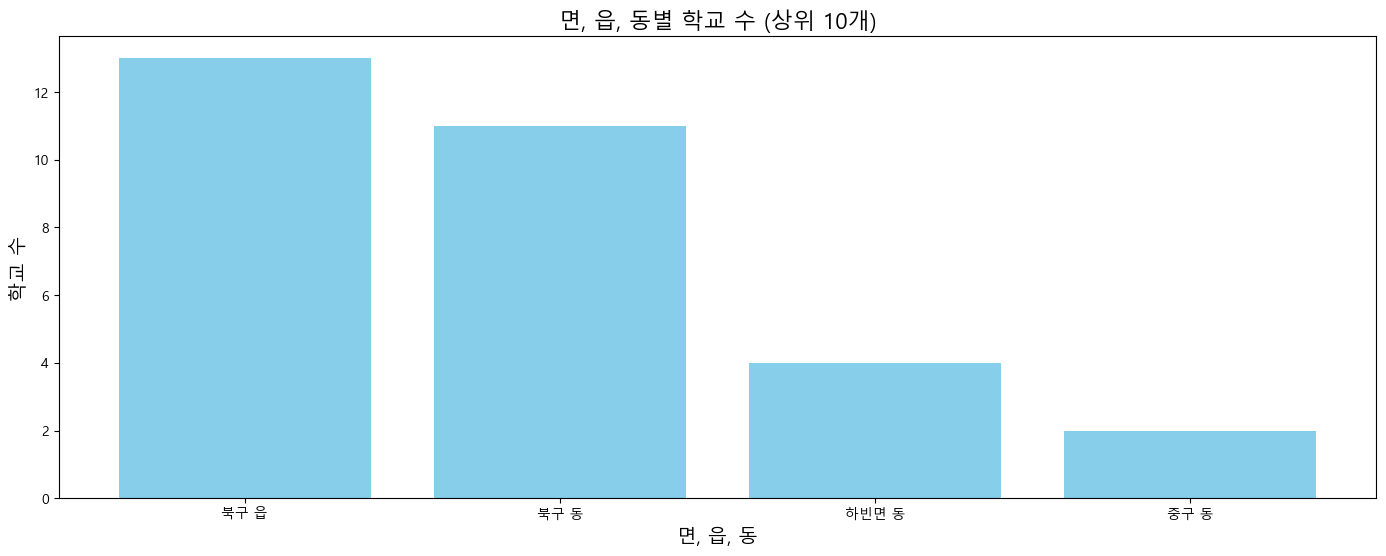

In [59]:
school_data['구_동'] = school_data['소재지지번주소'].str.extract(r'(대구광역시\w+(?:군|구)\w+(?:동|읍|면))')

top_10_location = school_data['읍면동'].value_counts().head(20)

plt.figure(figsize=(17, 6))
plt.bar(top_10_location.index, top_10_location.values, color='skyblue')

plt.rcParams['font.family'] = 'Malgun Gothic' 
plt.rcParams['axes.unicode_minus'] = False 

plt.title('면, 읍, 동별 학교 수 (상위 10개)', fontsize=16)
plt.xlabel('면, 읍, 동', fontsize=14)
plt.ylabel('학교 수', fontsize=14)

plt.show()
